# Insurance Claim Fraud Detection

In [298]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

# Data Pre-Processing & EDA

In [237]:
# read data
df = pd.read_csv('data/insuranceFraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,1/25/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,1/21/2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2/22/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,1/10/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2/17/2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [238]:
# check data size
df.shape

(1000, 39)

In [239]:
# replace '?' with np.NaN
df = df.replace('?', np.NaN)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,1/25/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,1/21/2015,Vehicle Theft,NaN,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NaN,0,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2/22/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,1/10/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NaN,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2/17/2015,Vehicle Theft,NaN,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [240]:
# check number of nan values
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [241]:
# delete unnecessary column
df = df.drop(['policy_number','policy_bind_date','insured_zip','incident_location','incident_date' ,'auto_make', 'auto_model'], axis=1)

In [242]:
# check the column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_csl                   1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_sex                  1000 non-null   object 
 8   insured_education_level      1000 non-null   object 
 9   insured_occupation           1000 non-null   object 
 10  insured_hobbies              1000 non-null   object 
 11  insured_relationship         1000 non-null   object 
 12  capital-gains                1000 non-null   int64  
 13  capital-loss       

In [243]:
cat_columns = [col for col in df.columns if df[col].dtypes == object]
cat_columns.remove('fraud_reported')
print(f'Categorical columns:{len(cat_columns)}\n{cat_columns}')
num_columns = [col for col in df.columns if df[col].dtypes != object] 
print(f'Numerical columns:{len(num_columns)}\n{num_columns}')

Categorical columns:15
['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available']
Numerical columns:16
['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']


In [244]:
# check numeric columns whether they are categoric or not
df[num_columns].head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,328,48,1000,1406.91,0,53300,0,5,1,1,2,71610,6510,13020,52080,2004
1,228,42,2000,1197.22,5000000,0,0,8,1,0,0,5070,780,780,3510,2007
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,3,34650,7700,3850,23100,2007
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,1,6500,1300,650,4550,2009


In [245]:
# check the number of unique values for numeric columns
df[num_columns].nunique()

months_as_customer             391
age                             46
policy_deductable                3
policy_annual_premium          991
umbrella_limit                  11
capital-gains                  338
capital-loss                   354
incident_hour_of_the_day        24
number_of_vehicles_involved      4
bodily_injuries                  3
witnesses                        4
total_claim_amount             763
injury_claim                   638
property_claim                 626
vehicle_claim                  726
auto_year                       21
dtype: int64

In [246]:
# check the number of unique values for categoric columns
df[cat_columns].nunique()

policy_state                3
policy_csl                  3
insured_sex                 2
insured_education_level     7
insured_occupation         14
insured_hobbies            20
insured_relationship        6
incident_type               4
collision_type              3
incident_severity           4
authorities_contacted       5
incident_state              7
incident_city               7
property_damage             2
police_report_available     2
dtype: int64

# EDA (Exploratory Data Analysis)

## Exploring Target (fraud_reported)

In [247]:
# checking value counts for fraud_reported
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

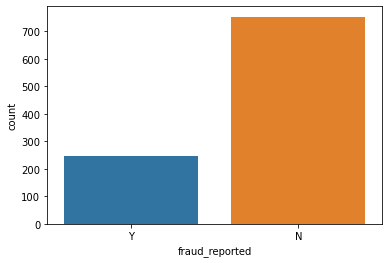

In [248]:
sns.countplot(df['fraud_reported'])

## Exploring Categorical Features

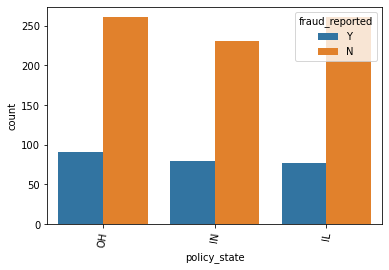

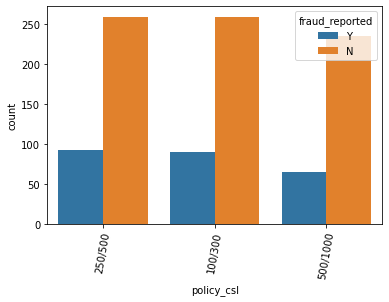

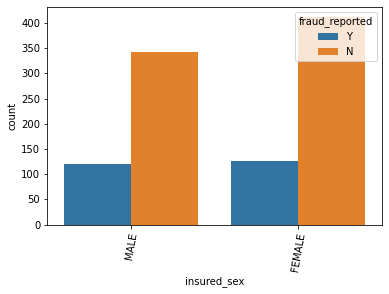

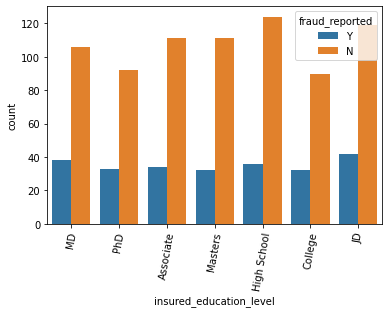

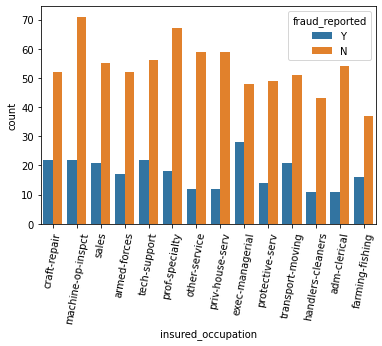

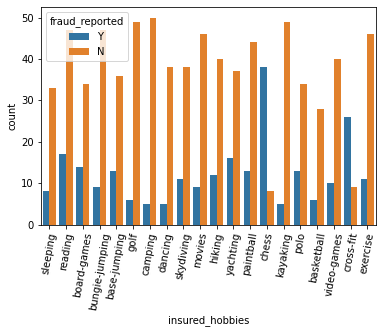

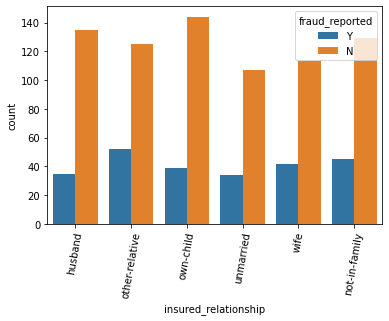

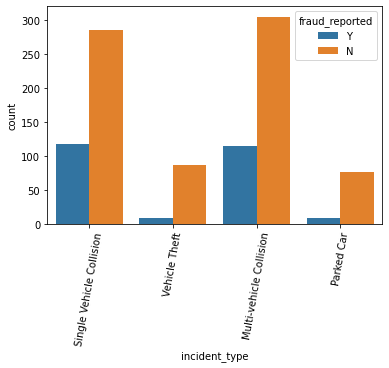

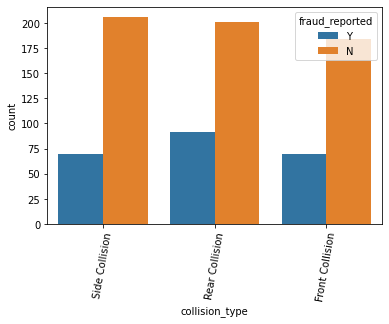

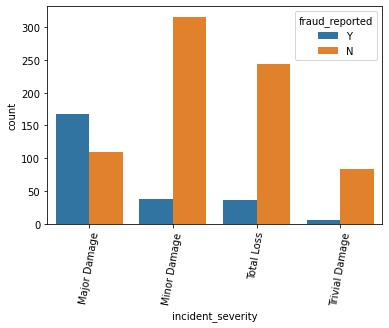

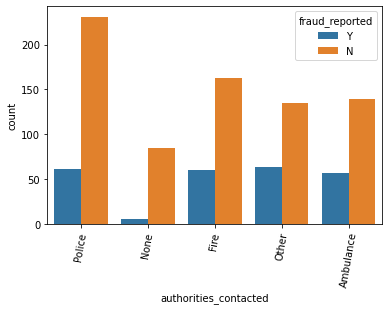

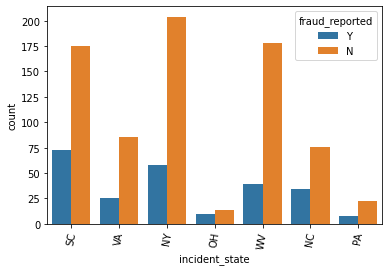

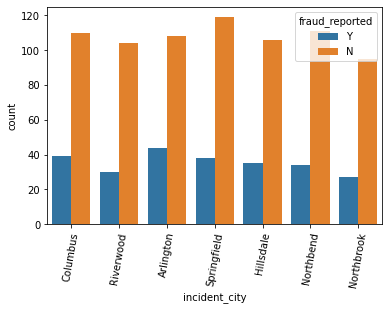

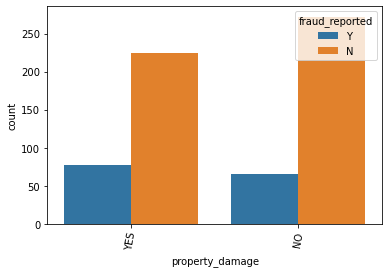

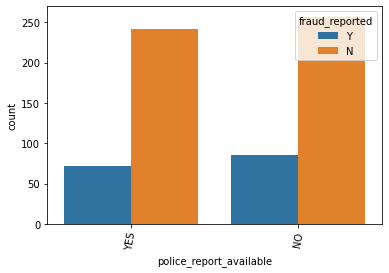

In [249]:
# visualize categorical features vs target
for col in df[cat_columns].columns:
    sns.countplot(data=df ,x=col, hue='fraud_reported')
    plt.xticks(rotation=80)
    plt.show()

In [250]:
# checking unique values for each category 
for col in cat_columns:
    print(f'\n{col.upper()} : {df[col].nunique()}')
    print(df[col].value_counts()) 


POLICY_STATE : 3
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

POLICY_CSL : 3
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

INSURED_SEX : 2
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

INSURED_EDUCATION_LEVEL : 7
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

INSURED_OCCUPATION : 14
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

INSURED_HOBBIES : 20
reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf          

**Observations:**
* Claims made by the insured who are exec-manegerial are more likely to be fraudulent than other occupaticion.
* Claims made by the insured who like to play chess are more likely to be fraudulent.
* Claims made as a result of collision are mostly likely to be fraud.
* Insurance claims made after an accident that resulted in major damage are more prone to fraud.

## Exploring Numerical Features

In [251]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


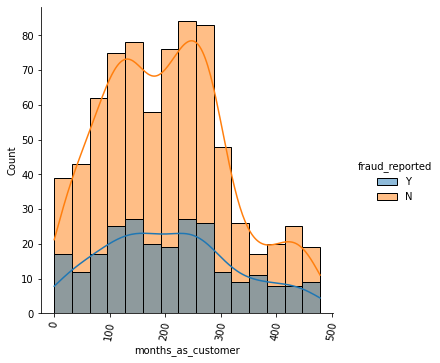

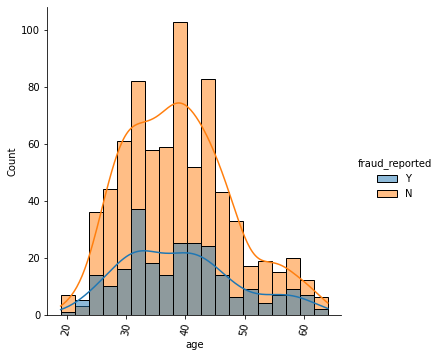

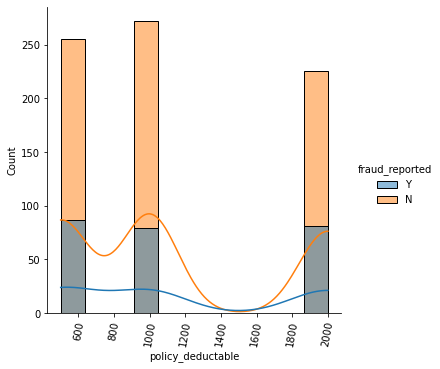

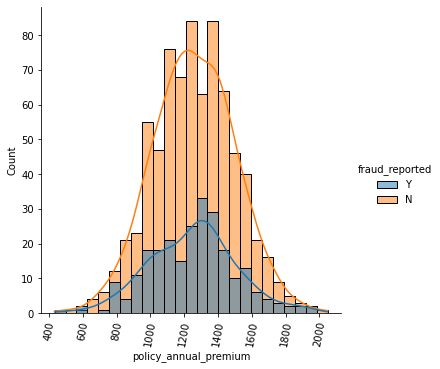

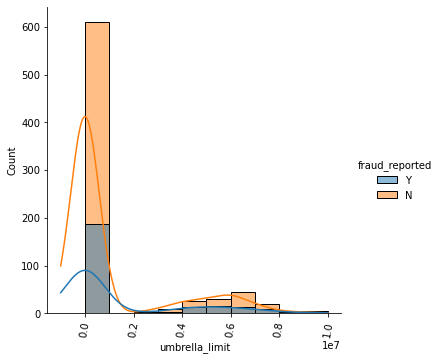

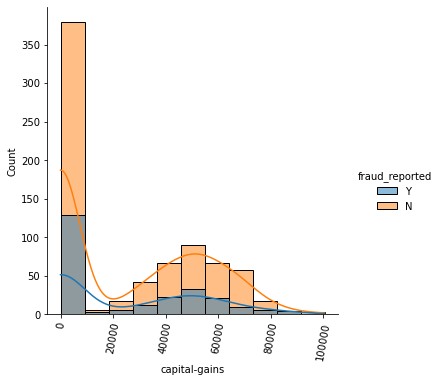

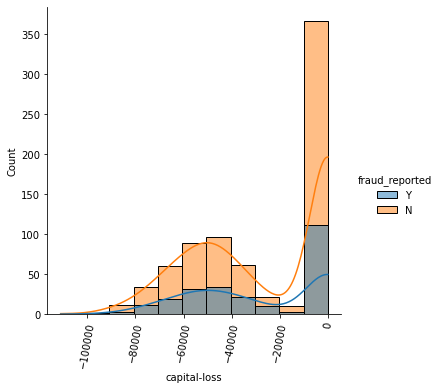

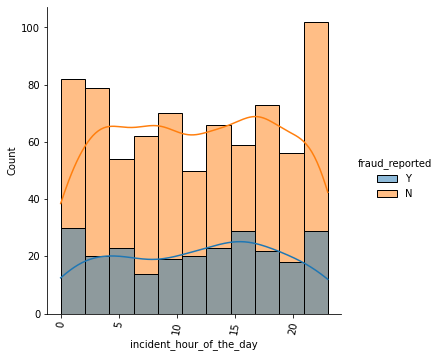

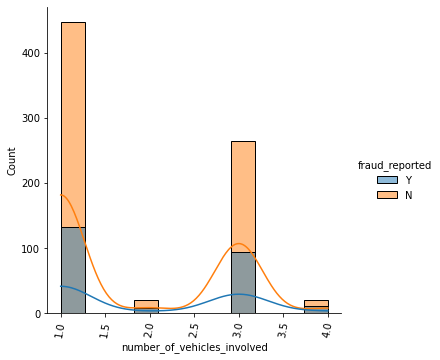

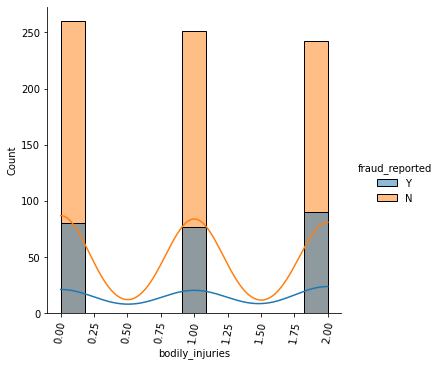

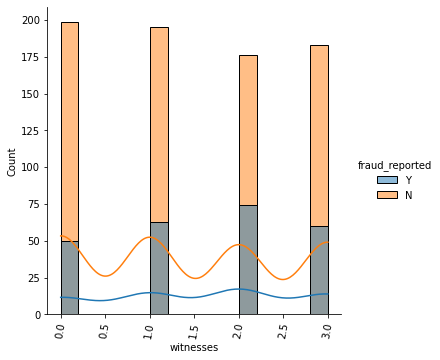

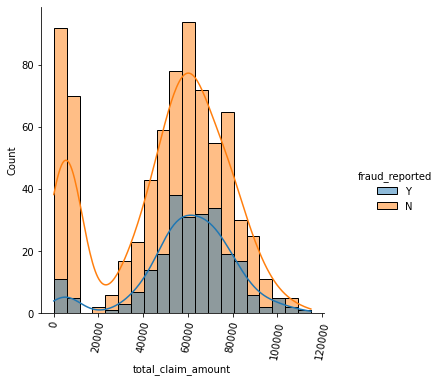

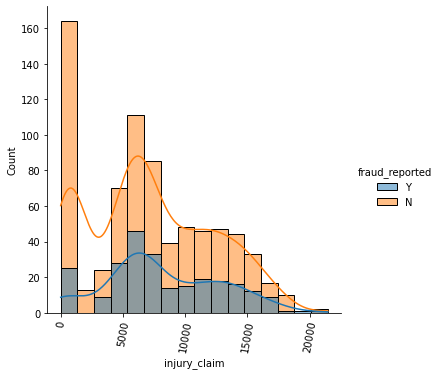

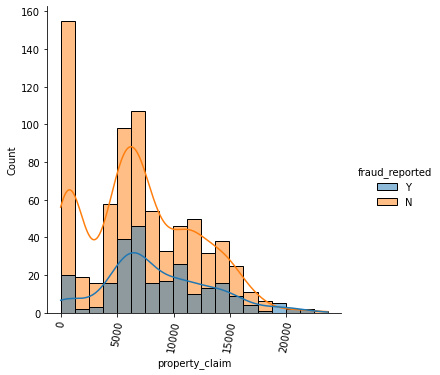

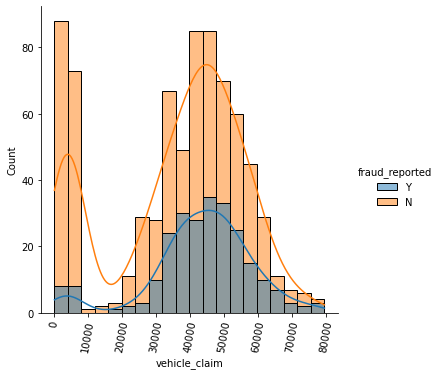

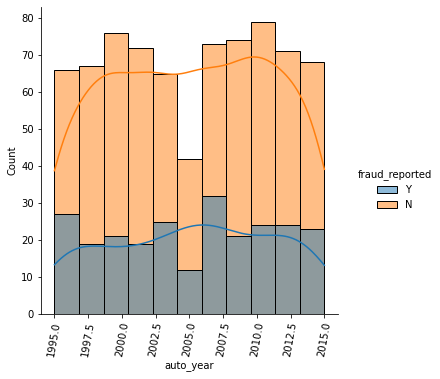

In [252]:
# visualize distribution of numerical features vs target
for col in df[num_columns].columns:
    sns.displot(data=df ,x=col,kde=True,hue='fraud_reported' )
    plt.xticks(rotation=80)
    plt.show()

<AxesSubplot:>

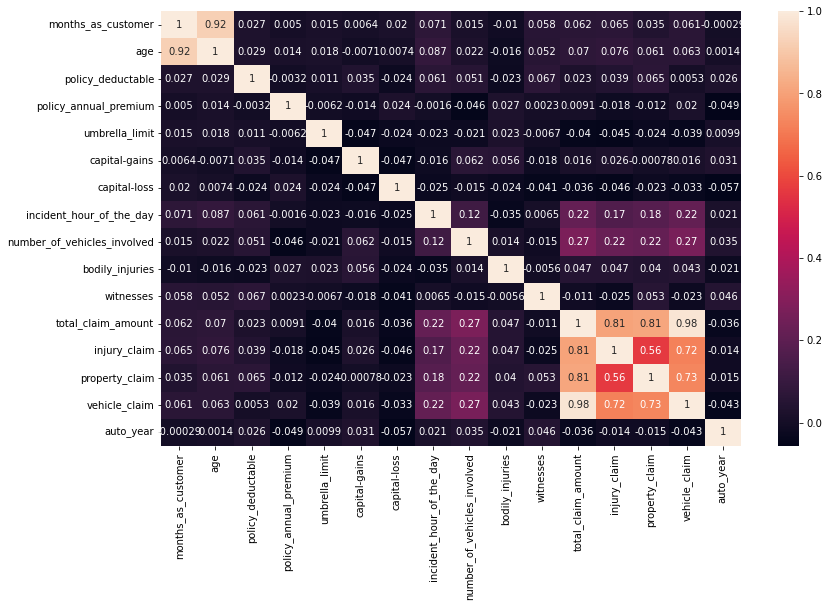

In [253]:
# checking correlation 
plt.figure(figsize=(13,8))
sns.heatmap(df[num_columns].corr(), annot=True )

# Feature Engineering 

## Missing Values

<AxesSubplot:xlabel='property_claim', ylabel='property_damage'>

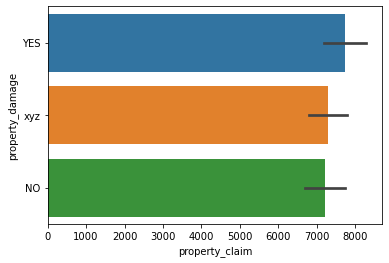

In [254]:
sns.barplot(data =df.fillna('xyz'),  x='property_claim', y='property_damage')

In [255]:
df['property_damage'].value_counts(dropna=False) #mode()

NaN    360
NO     338
YES    302
Name: property_damage, dtype: int64

In [256]:
df['police_report_available'].value_counts(dropna=False) #mode()

NaN    343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [257]:
df['collision_type'].value_counts(dropna=False)

Rear Collision     292
Side Collision     276
Front Collision    254
NaN                178
Name: collision_type, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Single Vehicle Collision'),
  Text(1, 0, 'Vehicle Theft'),
  Text(2, 0, 'Multi-vehicle Collision'),
  Text(3, 0, 'Parked Car')])

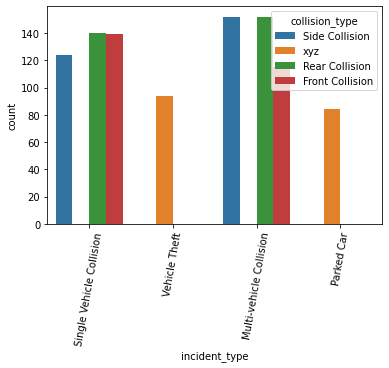

In [258]:
sns.countplot(data= df.fillna('xyz'),x='incident_type', hue='collision_type')
plt.xticks(rotation=80)

In [259]:
# drop features : police_report_available, property_damage
# because most of the data are missing for these features
df.drop(['police_report_available', 'property_damage'], axis=1, inplace=True)

In [260]:
# impute na values in the collision_type with 'no-collision'
df['collision_type'].fillna('no-collision',inplace=True)
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,1,2,71610,6510,13020,52080,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,no-collision,Minor Damage,Police,VA,Riverwood,8,1,0,0,5070,780,780,3510,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,2,3,34650,7700,3850,23100,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,1,2,63400,6340,6340,50720,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,no-collision,Minor Damage,None,NY,Arlington,20,1,0,1,6500,1300,650,4550,2009,N


In [261]:
cat_columns.remove('police_report_available')

In [262]:
cat_columns.remove('property_damage')

In [263]:
cat_columns


['policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city']

## Split features and target

In [287]:
X = df.drop('fraud_reported',axis=1)
y=df['fraud_reported']

In [288]:
le = LabelEncoder()
y = le.fit_transform(y)

In [289]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

## Feature Encoding

In [290]:
# Encode categoric values
# Scale numeric values
transformer = make_column_transformer(
    (StandardScaler(), [col for col in X_train.columns if df[col].dtype != object]),
    (OneHotEncoder(sparse=False),[col for col in X_train.columns if df[col].dtype == object]),
     remainder='passthrough')


In [295]:
pipeline = Pipeline(
    [('Transformer', transformer),
    ('Model', XGBClassifier())
    ])

pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)

In [297]:
confusion_matrix(y_test,y_pred)

array([[175,  25],
       [ 48,  52]], dtype=int64)

In [ ]:
pipeline1 = Pipeline(
    [('Transformer', transformer),
    ('Model', XGBClassifier())
    ])

pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)

In [ ]:
pipeline2 = Pipeline(
    [('Transformer', transformer),
    ('Model', ())
    ])

pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)

In [302]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [303]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [310]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, transfromer, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # encode target  
    y = LabelEncoder().fit_transform(y)
    
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    # pre-process features
    X_train = transformer.fit_transform(X_train)
    X_test = transformer.transform(X_test)
    
    models_list = []
    accuracy_list = []
    
    for i in range(len(list(models))):
        
        model = list(models.values())[i]
        
        # Train model
        model.fit(X_train, y_train) 

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)
        

        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)
        
        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
        
        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        accuracy_list.append(model_test_accuracy)
        print('='*35)
        print('\n')
        
    report = pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=["Accuracy"])    
    return report

In [311]:
report_pca = evaluate_models(X,y,transformer, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7600
- F1 score: 0.5000
- Precision: 0.5854
- Recall: 0.4364
- Roc Auc Score: 0.6596


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7600
- F1 score: 0.5472
- Precision: 0.5686
- Recall: 0.5273
- Roc Auc Score: 0.6878


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9700
- F1 score: 0.9362
- Precision: 0.9565
- Recall: 0.9167
- Roc Auc Score: 0.9518
----------------------------------
Model performance for Test set
- Accuracy: 0.7800
- F1 score: 0.5926
- Precision: 0.6038
- Recall: 0.5818
- Roc Auc Score: 0.7185


Logistic Regression
Model performance for Training 

In [312]:
report_pca

,Model Name,Accuracy
4,K-Neighbors Classifier,0.655
6,AdaBoost Classifier,0.735
0,Random Forest,0.760
1,Decision Tree,0.760
5,XGBClassifier,0.770
2,Gradient Boosting,0.780
3,Logistic Regression,0.785
